# Recommender System for Board Games from [BoardGameGeek.com](https://boardgamegeek.com/)



1.   Iatrou Manos
2.   Papageorgiou Vasileios
3. Sykianakis Xaralambos




# Dataset Description



*   Games File
*   User Ratings File
*   Mechanics File
*   Themes File



In [1]:
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('games.csv')
mechanics =  pd.read_csv('mechanics.csv')
themes =  pd.read_csv('themes.csv')
user_ratings =  pd.read_csv('user_ratings.csv')

In [3]:
columns_to_keep = ['BGGId', 'YearPublished', 'GameWeight','NumWish','MfgPlaytime','MfgAgeRec','NumAlternates','NumExpansions','NumImplementations','Kickstarted',
                   'Cat:Thematic','Cat:Strategy','Cat:War','Cat:Family','Cat:CGS','Cat:Abstract','Cat:Party','Cat:Childrens']

In [4]:
games = games[columns_to_keep]

In [5]:
def replace_non_zero_with_column_name(row):
    for col in games.columns:
        if col != 'BGGId' and col != 'YearPublished' and row[col] != 0:
            row[col] = col
    return row

games_v2= games.apply(replace_non_zero_with_column_name, axis=1)

In [6]:
def replace_non_zero_with_column_name(row):
    for col in mechanics.columns:
        if col != 'BGGId' and row[col] != 0:
            row[col] = col
    return row

mechanics_v2= mechanics.apply(replace_non_zero_with_column_name, axis=1)

In [7]:
def replace_non_zero_with_column_name(row):
    for col in themes.columns:
        if col != 'BGGId' and row[col] != 0:
            row[col] = col
    return row

themes_v2= themes.apply(replace_non_zero_with_column_name, axis=1)

In [8]:
columns_to_exclude = ['BGGId', 'YearPublished']
replace_dict = {col: {0: ""} for col in games_v2.columns if col not in columns_to_exclude}

games_v2.replace(replace_dict, inplace=True)

In [9]:
# games_v2.replace(0, "", inplace=True)
mechanics_v2.replace(0, "", inplace=True)
themes_v2.replace(0, "", inplace=True)

In [10]:
def concatenate_columns_except_bggid(row):
    return ' '.join(map(str, [row[col] for col in games_v2.columns if col != 'BGGId' and col != 'YearPublished']))

games_v2['games'] = games_v2.apply(concatenate_columns_except_bggid, axis=1)

In [11]:
def concatenate_columns_except_bggid(row):
    return ' '.join(map(str, [row[col] for col in mechanics_v2.columns if col != 'BGGId']))

mechanics_v2['mechanics'] = mechanics_v2.apply(concatenate_columns_except_bggid, axis=1)

In [12]:
def concatenate_columns_except_bggid(row):
    return ' '.join(map(str, [row[col] for col in themes_v2.columns if col != 'BGGId']))

themes_v2['themes'] = themes_v2.apply(concatenate_columns_except_bggid, axis=1)

In [13]:
games_v2 = games_v2[['BGGId','YearPublished','games']]
mechanics_v2 = mechanics_v2[['BGGId', 'mechanics']]
themes_v2 = themes_v2[['BGGId', 'themes']]

In [14]:
def remove_extra_spaces(text):
    return ' '.join(text.split())

In [15]:
games_v2['games'] = games_v2['games'].apply(remove_extra_spaces)
mechanics_v2['mechanics'] = mechanics_v2['mechanics'].apply(remove_extra_spaces)
themes_v2['themes'] = themes_v2['themes'].apply(remove_extra_spaces)

In [16]:
merged_df = pd.merge(games_v2, mechanics_v2, on='BGGId')
games = pd.merge(merged_df, themes_v2, on='BGGId')

In [17]:
games = games.astype({'BGGId':'int'})
games = games.astype({'YearPublished':'int'})

In [18]:
games

,BGGId,YearPublished,games,mechanics,themes
0,1,1986,GameWeight NumWish MfgPlaytime MfgAgeRec NumAl...,Alliances Area Majority / Influence Auction/Bi...,Economic Political
1,2,1981,GameWeight NumWish MfgPlaytime MfgAgeRec NumIm...,Trick-taking,Fantasy
2,3,1998,GameWeight NumWish MfgPlaytime MfgAgeRec NumAl...,Area Majority / Influence Hand Management Hexa...,Medieval Theme_Samurai
3,4,1992,GameWeight NumWish MfgPlaytime MfgAgeRec,Area Majority / Influence Auction/Bidding Set ...,Ancient
4,5,1964,GameWeight NumWish MfgPlaytime MfgAgeRec NumAl...,Hand Management Tile Placement Investment Mark...,Economic
...,...,...,...,...,...
21920,347146,2021,NumWish MfgPlaytime MfgAgeRec,Auction/Bidding Trick-taking,
21921,347521,2019,GameWeight NumWish MfgPlaytime MfgAgeRec NumIm...,Area Majority / Influence Hand Management Race...,World War II
21922,348955,2021,GameWeight NumWish MfgPlaytime MfgAgeRec Kicks...,Dice Rolling Solo / Solitaire Game Die Icon Re...,
21923,349131,2021,GameWeight NumWish MfgPlaytime MfgAgeRec,Dice Rolling Pattern Building,


In [19]:
from sklearn.preprocessing import LabelEncoder

column_to_encode = 'Username'
label_encoder = LabelEncoder()
user_ratings[column_to_encode] = label_encoder.fit_transform(user_ratings[column_to_encode])

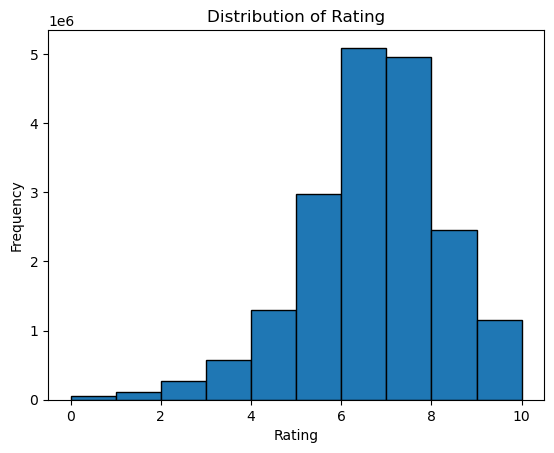

In [20]:
your_column = 'Rating'

plt.hist(user_ratings[your_column], bins=10, edgecolor='black')
plt.title(f'Distribution of {your_column}')
plt.xlabel(your_column)
plt.ylabel('Frequency')
plt.show()

In [21]:
user_ratings['sentiment'] = user_ratings['Rating'].apply(lambda x: 0 if x <= 5 else (1 if x <= 8 else 2))

In [22]:
user_ratings = user_ratings.drop('Rating', axis=1)

In [10]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# percentage_to_keep = 10

# num_rows_to_keep = int(len(user_ratings) * (percentage_to_keep / 100))
# user_ratings_subset = user_ratings.sample(n=num_rows_to_keep, random_state=42)
# merged_df = pd.merge(user_ratings_subset, games, on='BGGId')
# X = merged_df.drop(['BGGId', 'sentiment'], axis=1)
# y = merged_df['sentiment']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic_model = LogisticRegression()
# logistic_model.fit(X_train, y_train)

# y_pred = logistic_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')